<a href="https://colab.research.google.com/github/tkddntj/yolov5/blob/master/VGG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
### Step 0 : Import Library ###
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision.transforms as transforms
import torchvision.datasets as dsets 
import torchvision
import time
import os

import matplotlib.pyplot as plt
%matplotlib inline  
import numpy as np

In [3]:
def MNIST_print(Loader):
    # Input is train_loader
    # Visualize the number of num_print image.
    num_print = 3

    image, label = next(iter(train_loader))

    plt.figure(figsize=(5,5))

    for i in range(num_print**2):
        img = image[i].squeeze().numpy()

        plt.subplot(num_print,num_print,i+1)
        plt.imshow(img,cmap='gray')
        plt.axis('off')
        plt.title(label[i].item())
        

In [4]:
### Step 1 : Loading Dataset ###
# MNIST dataset

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5), (0.5))]
     )

train_dataset = dsets.MNIST(root='data/',
                          train=True,
                          transform=transform,
                          download=True)

test_dataset = dsets.MNIST(root='data/',
                         train=False,
                         transform=transform,
                         download=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



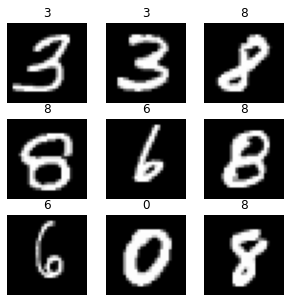

In [5]:
### Step 2 : Preparing Training And Test Set With Data Augmentation ###
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=32, shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=32, shuffle=False)


MNIST_print(train_loader)

In [6]:
### Step 3 :  Create Model ###
class VGG_16(nn.Module):
    def __init__(self):
        super(VGG_16,self).__init__()

        ### Code Here ###
        # Layer : conv1_1
        self.conv3_64_1 = nn.Conv2d(1, 64, kernel_size=3, padding=1)
        self.bn64_1 = nn.BatchNorm2d(64)
        self.relu_64_1 = nn.ReLU()
        # Layer : conv1_2
        self.conv3_64_2 = nn.Conv2d(64, 64, kernel_size=3, padding=1)
        self.bn64_2 = nn.BatchNorm2d(64)
        self.relu_64_2 = nn.ReLU()
        # Maxpool 64
        self.maxpool2d_64 = nn.MaxPool2d(kernel_size=(2,2))
        
        # Layer : conv2_1
        self.conv3_128_1 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.bn128_1 = nn.BatchNorm2d(128)
        self.relu_128_1 = nn.ReLU()
        # Layer : conv2_2
        self.conv3_128_2 = nn.Conv2d(128, 128, kernel_size=3, padding=1)
        self.bn128_2 = nn.BatchNorm2d(128)
        self.relu_128_2 = nn.ReLU()
        # Maxpool 128
        self.maxpool2d_128 = nn.MaxPool2d(kernel_size=(2,2))
        
        # Layer : conv3_1
        self.conv3_256_1 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.bn256_1 = nn.BatchNorm2d(256)
        self.relu_256_1 = nn.ReLU()
        # Layer : conv3_2
        self.conv3_256_2 = nn.Conv2d(256, 256, kernel_size=3, padding=1)
        self.bn256_2 = nn.BatchNorm2d(256)
        self.relu_256_2 = nn.ReLU()
        # Layer : conv3_3
        self.conv3_256_3 = nn.Conv2d(256, 256, kernel_size=3, padding=1)
        self.bn256_3 = nn.BatchNorm2d(256)
        self.relu_256_3 = nn.ReLU()
        # Maxpool 256
        self.maxpool2d_256 = nn.MaxPool2d(kernel_size=(2,2),ceil_mode=True)
        
        # Layer : conv4_1
        self.conv3_512_1 = nn.Conv2d(256, 512, kernel_size=3, padding=1)
        self.bn512_1 = nn.BatchNorm2d(512)
        self.relu_512_1 = nn.ReLU()
        # Layer : conv4_3
        self.conv3_512_2 = nn.Conv2d(512, 512, kernel_size=3, padding=1)
        self.bn512_2 = nn.BatchNorm2d(512)
        self.relu_512_2 = nn.ReLU()
        # Layer : conv4_3
        self.conv3_512_3 = nn.Conv2d(512, 512, kernel_size=3, padding=1)
        self.bn512_3 = nn.BatchNorm2d(512)
        self.relu_512_3 = nn.ReLU()
        # Maxpool 512
        self.maxpool2d_512_1 = nn.MaxPool2d(kernel_size=(2,2))
        
        # Layer : conv5_1
        self.conv3_512_4 = nn.Conv2d(512, 512, kernel_size=3, padding=1)
        self.bn512_4 = nn.BatchNorm2d(512)
        self.relu_512_4 = nn.ReLU()
        # Layer : conv5_2
        self.conv3_512_5 = nn.Conv2d(512, 512, kernel_size=3, padding=1)
        self.bn512_5 = nn.BatchNorm2d(512)
        self.relu_512_5 = nn.ReLU()
        # Layer : conv5_3
        self.conv3_512_6 = nn.Conv2d(512, 512, kernel_size=3, padding=1)
        self.bn512_6 = nn.BatchNorm2d(512)
        self.relu_512_6 = nn.ReLU()

        # Fully connected layer input : 512, output : 10
        self.maxpool2d_512_2 = nn.MaxPool2d(kernel_size=(3,1),padding=1)
        #################

    def forward(self,x):

        ### Code Here ###
        # Layer : conv1_1
        out = self.conv3_64_1(x)
        out = self.bn64_1(out)
        out = self.relu_64_1(out)
        # Layer : conv1_2
        out = self.conv3_64_2(out)
        out = self.bn64_2(out)
        out = self.relu_64_2(out)
        # Layer : conv2_1
        out = self.conv3_128_1(out)
        out = self.bn128_1(out)
        out = self.relu_128_1(out)
        # Layer : conv2_2
        out = self.conv3_128_2(out)
        out = self.bn128_2(out)
        out = self.relu_128_2(out)
        # Layer : conv3_1
        out = self.conv3_256_1(out)
        out = self.bn256_1(out)
        out = self.relu_256_1(out)
        # Layer : conv3_2
        out = self.conv3_256_2(out)
        out = self.bn256_2(out)
        out = self.relu_256_2(out)
        # Layer : conv3_3
        out = self.conv3_256_3(out)
        out = self.bn256_3(out)
        out = self.relu_256_3(out)
        # Layer : conv4_1
        out = self.conv3_512_1(out)
        out = self.bn5121(out)
        out = self.relu_512_1(out)
        # Layer : conv4_2
        out = self.conv3_512_2(out)
        out = self.bn512_2(out)
        out = self.relu_512_2(out)
        # Layer : conv4_3
        out = self.conv3_512_3(out)
        out = self.bn512_3(out)
        out = self.relu_512_3(out)
        # Layer : conv5_1
        out = self.conv3_512_4(out)
        out = self.bn512_4(out)
        out = self.relu_512_4(out)
        # Layer : conv5_2
        out = self.conv3_512_5(out)
        out = self.bn512_5(out)
        out = self.relu_512_5(out)
        # Layer : conv5_3
        out = self.conv3_512_6(out)
        out = self.bn512_6(out)
        out = self.relu_512_6(out)
        # out = self.maxpool2d_512_2(out)
        
        # Flatten with batch size
        out = out.view(out.size(0), -1)
        
        # Layer : Fully Connected Layer.
        out = self.fc1(out)
        #################

        return out

In [7]:
### Step 4 :  Instantiate Model Class ###
model = VGG_16()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# device = torch.device('mps')
print(device)

model.to(device)

cpu


VGG_16(
  (conv3_64_1): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn64_1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu_64_1): ReLU()
  (conv3_64_2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn64_2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu_64_2): ReLU()
  (maxpool2d_64): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (conv3_128_1): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn128_1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu_128_1): ReLU()
  (conv3_128_2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn128_2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu_128_2): ReLU()
  (maxpool2d_128): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mod

In [8]:
### Step 5 : Instantiate Loss Class ###

# loss function
criterion = nn.CrossEntropyLoss()
print("### Step 5 End ###")

### Step 5 End ###


In [9]:
### Step 6 : Instantiate Optimizer Class ###
# Learning Rate
lr = 1e-6
momentum = 0.9
weight_decay = 1e-5

optimizer = torch.optim.SGD(model.parameters(), lr=lr, momentum = momentum, weight_decay = weight_decay)

In [10]:
### Step 7 : Train And Evaluation ###
total_epoch = 10

for epoch in range(total_epoch):
    model.train()

    for i, (image, label) in enumerate(train_loader):
        image = image.to(device)
        label = label.to(device)

        optimizer.zero_grad()

        output = model(image)

        loss = criterion(output,label)

        loss.backward()
        optimizer.step()

    model.eval()

    total = 0
    correct = 0 

    for image, label in test_loader:

        image = image.to(device)
        label = label.to(device)

        output = model(image)

        _,pred_label = torch.max(output.data,1)

        total += label.size(0)

        if torch.cuda.is_available():
            correct += (pred_label.cpu() == label.cpu()).sum()
        
        else:
            correct += (pred_label == label).sum()
        
        accuracy = 100*correct.item()/total
    print("Epoch : {}, Loss : {}, Accuracy : {}".format(epoch,loss.item(),accuracy))

AttributeError: ignored